In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train_data.txt", sep=" ::: ", engine="python", header=None)
train_df.columns = ["Id", "Title_Year", "Genre", "Overview"]

In [3]:
train_df.head()

,Id,Title_Year,Genre,Overview
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          54214 non-null  int64 
 1   Title_Year  54214 non-null  object
 2   Genre       54214 non-null  object
 3   Overview    54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [5]:
test_df = pd.read_csv("test_data.txt", sep=" ::: ", engine="python", header=None)
test_df.columns = ["Id", "Title_Year", "Overview"]

In [6]:
test_sol_df = pd.read_csv("test_data_solution.txt", sep=" ::: ", engine="python", header=None)
test_sol_df.columns = ["Id", "Title_Year", "Genre", "Overview"]

In [7]:
train_df.isnull().sum()

Id            0
Title_Year    0
Genre         0
Overview      0
dtype: int64

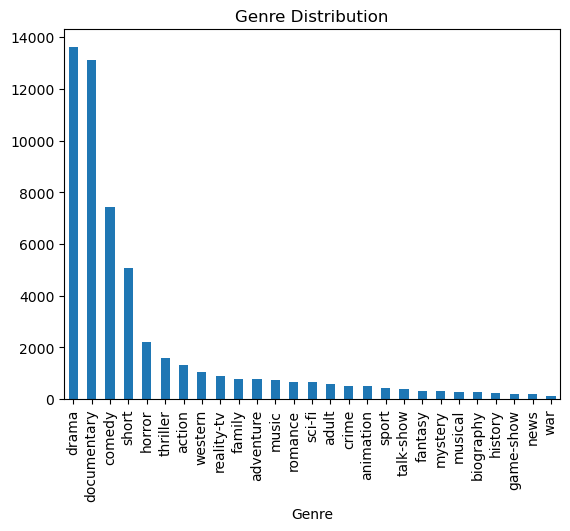

In [8]:
import matplotlib.pyplot as plt

train_df['Genre'].value_counts().plot(kind='bar')
plt.title("Genre Distribution")
plt.show()


In [9]:
genre_counts = train_df['Genre'].value_counts()
genre_percent = (genre_counts / len(train_df)) * 100
genre_summary = pd.DataFrame({'Count': genre_counts, 'Percentage': genre_percent})
print(genre_summary)


             Count  Percentage
Genre                         
drama        13613   25.109750
documentary  13096   24.156122
comedy        7447   13.736304
short         5073    9.357362
horror        2204    4.065371
thriller      1591    2.934666
action        1315    2.425573
western       1032    1.903567
reality-tv     884    1.630575
family         784    1.446121
adventure      775    1.429520
music          731    1.348360
romance        672    1.239532
sci-fi         647    1.193419
adult          590    1.088280
crime          505    0.931494
animation      498    0.918582
sport          432    0.796842
talk-show      391    0.721216
fantasy        323    0.595787
mystery        319    0.588409
musical        277    0.510938
biography      265    0.488804
history        243    0.448224
game-show      194    0.357841
news           181    0.333862
war            132    0.243480


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC

In [11]:
# Features and labels
X_train = train_df['Overview']
y_train = train_df['Genre']

X_test = test_df['Overview']
y_test = test_sol_df['Genre']  # ground truth from solutions

In [20]:
# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=100000, ngram_range=(1,2))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
# Handle imbalance with oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_tfidf, y_train)

In [32]:
# Train a logistic regression model
model = LogisticRegression(max_iter=300, class_weight='balanced', solver='liblinear')
model.fit(X_res, y_res)

LogisticRegression(class_weight='balanced', max_iter=300, solver='liblinear')

In [33]:
# Predictions"
y_pred = model.predict(X_test_tfidf)

In [34]:
y_pred[1]

'drama'

In [35]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5714944649446494
              precision    recall  f1-score   support

      action       0.37      0.50      0.43      1314
       adult       0.48      0.61      0.53       590
   adventure       0.33      0.32      0.32       775
   animation       0.31      0.23      0.26       498
   biography       0.10      0.04      0.06       264
      comedy       0.59      0.58      0.58      7446
       crime       0.20      0.25      0.22       505
 documentary       0.77      0.73      0.75     13096
       drama       0.67      0.58      0.62     13612
      family       0.25      0.28      0.26       783
     fantasy       0.22      0.19      0.20       322
   game-show       0.68      0.74      0.70       193
     history       0.12      0.10      0.11       243
      horror       0.57      0.69      0.62      2204
       music       0.45      0.72      0.55       731
     musical       0.22      0.20      0.21       276
     mystery       0.19      0.12      0.15       31

Classification Report:

{'precision': 0.24334600760456274, 'recall': 0.48484848484848486, 'f1-score': 0.3240506329113924, 'support': 132.0}


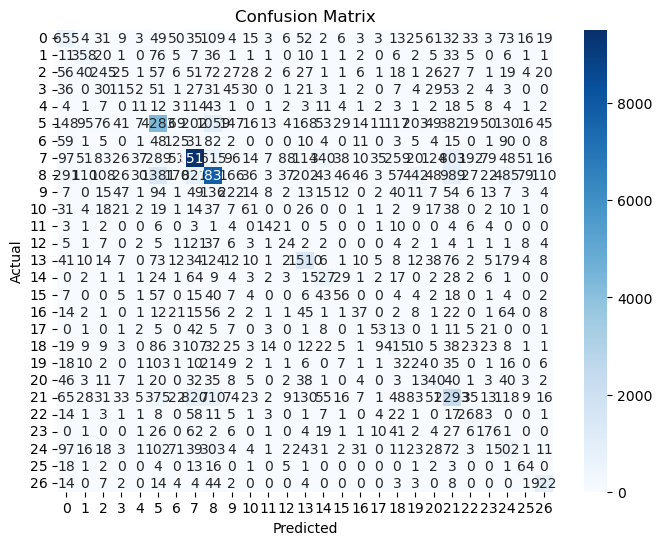

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Classification report (precision, recall, f1-score)
print("Classification Report:\n")
cla=classification_report(y_test, y_pred, digits=4, output_dict=True)
print(cla["war"])

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
